# Analysing Credit Card Defaults

## Exploratory Data Analysis

Import required libraries

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler




Dataset obtained from Kaggle: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset

In [2]:
df = pd.read_csv('/Users/winlaeyee/Downloads/UCI_Credit_Card.csv')
df.shape

(30000, 25)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [20]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# EDA

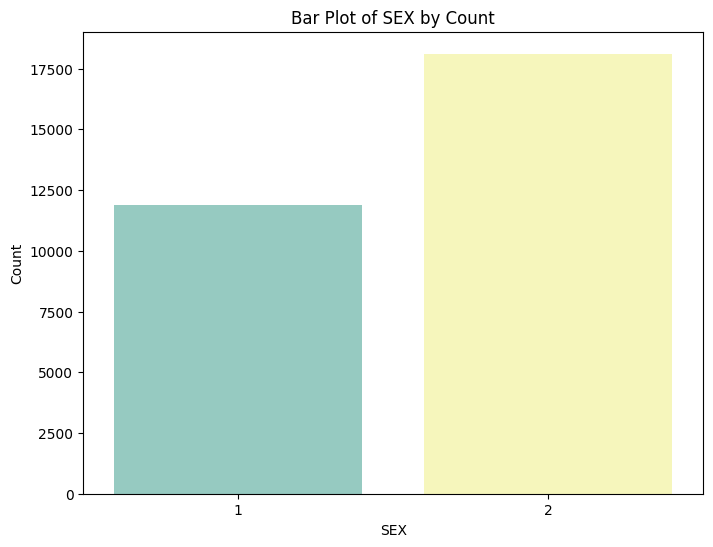

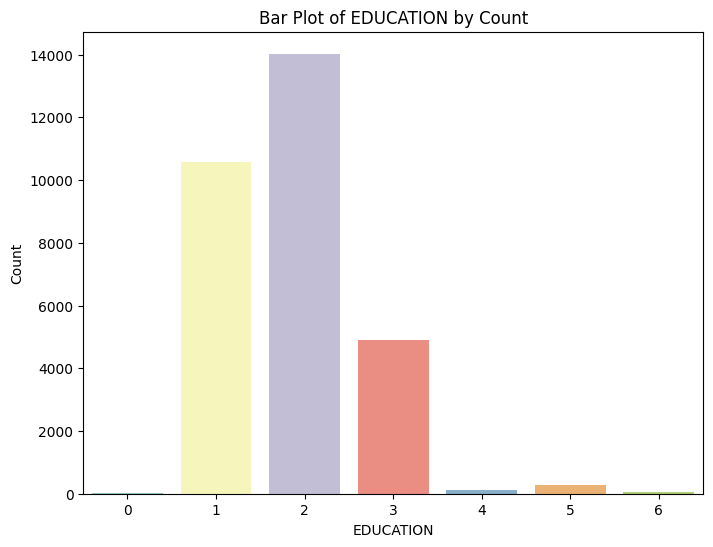

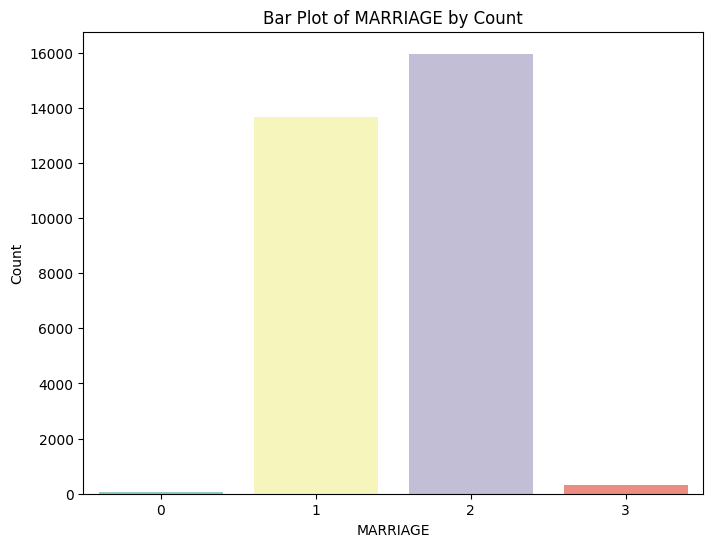

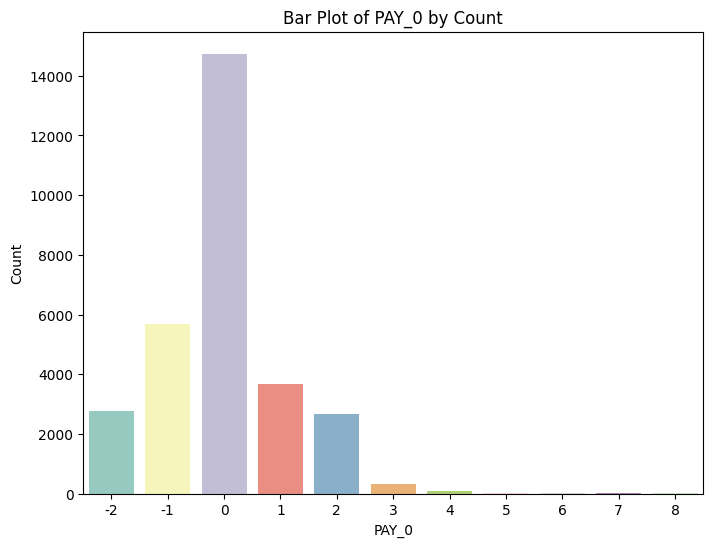

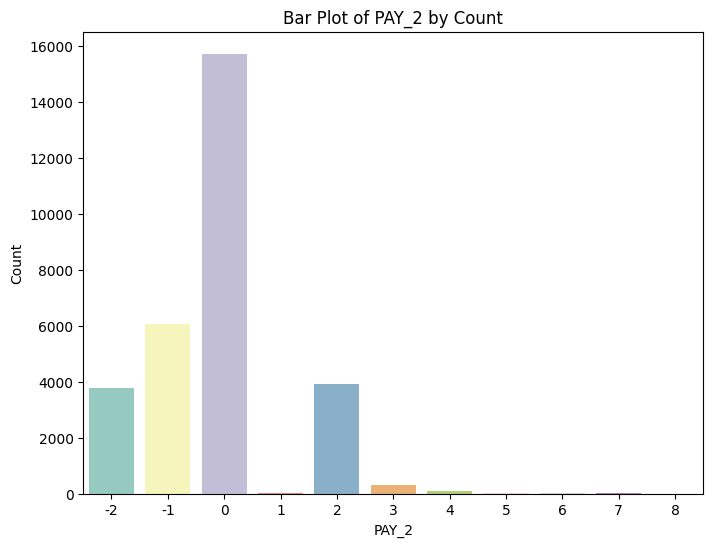

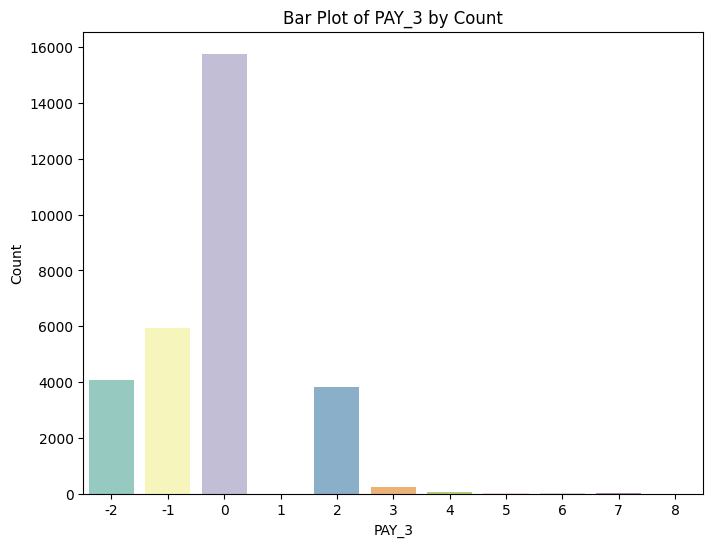

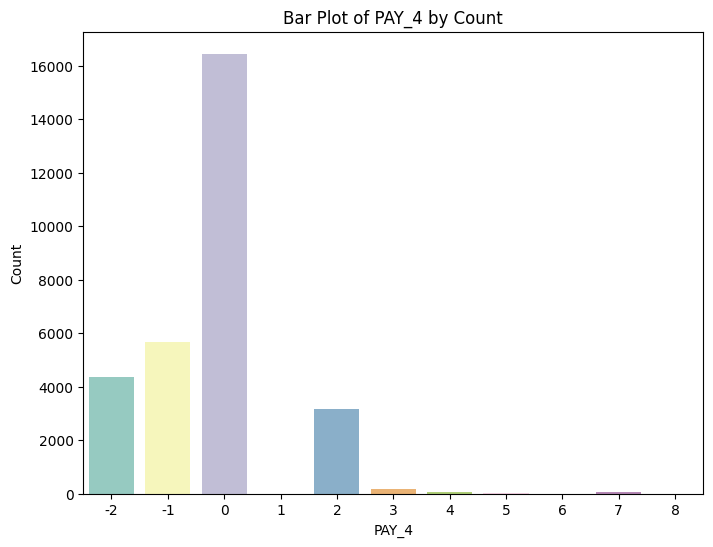

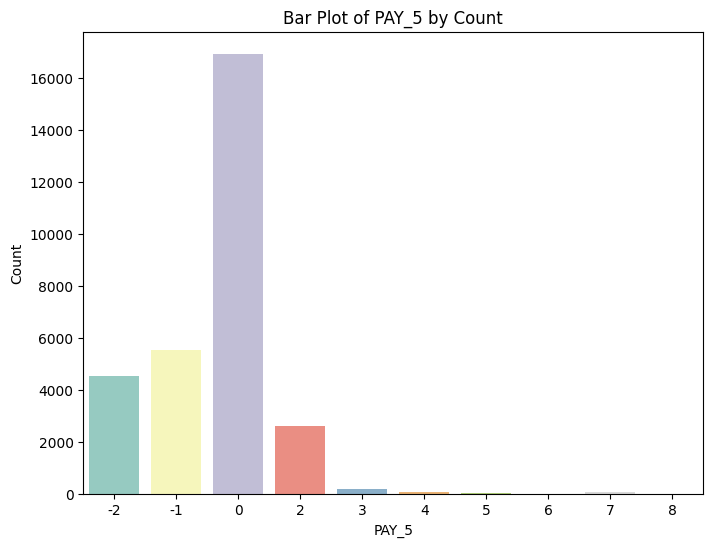

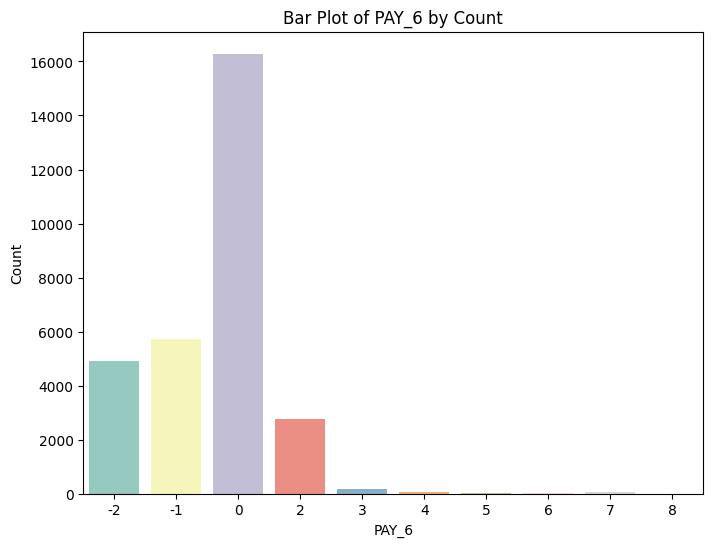

In [65]:
supposed_categorical_variables = ["SEX", "EDUCATION", "MARRIAGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]

#Create bar plots for each categorical variable
for variable in supposed_categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=variable, palette="Set3")
    plt.title(f"Bar Plot of {variable} by Count")
    plt.xlabel(variable)
    plt.ylabel("Count")
    plt.show()


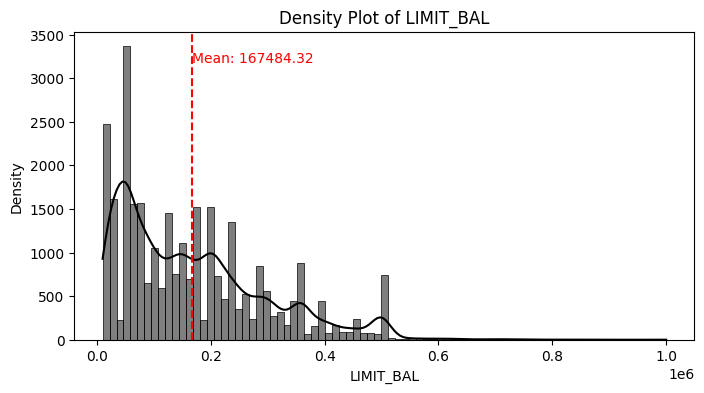

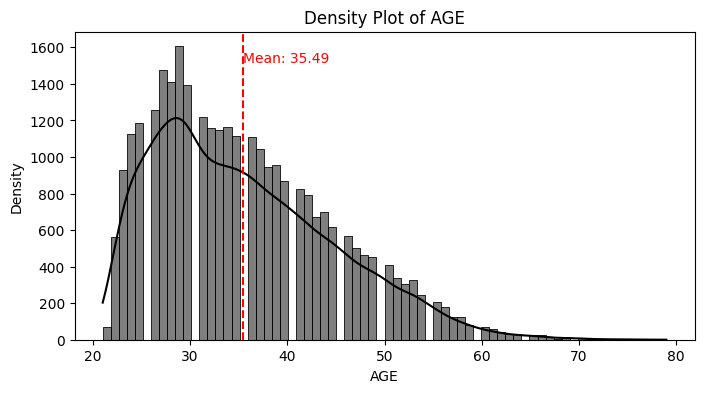

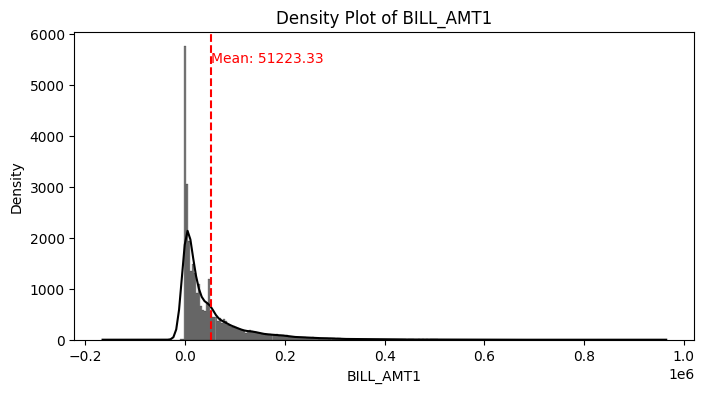

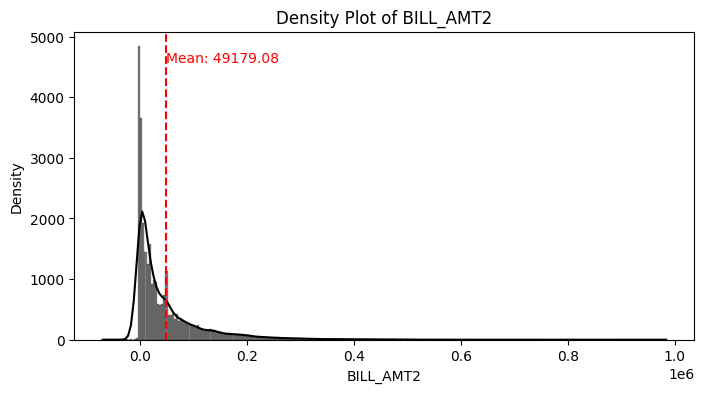

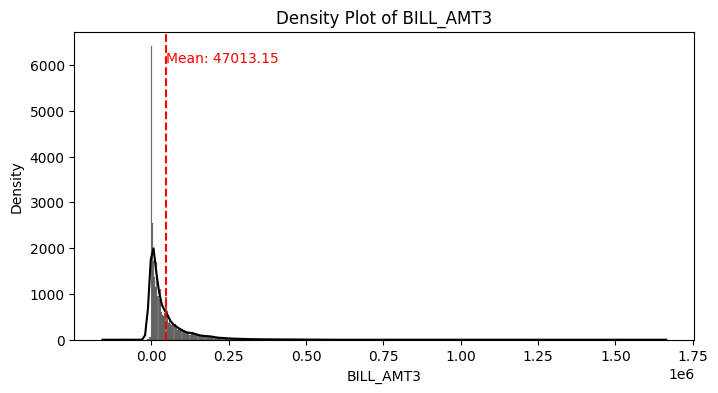

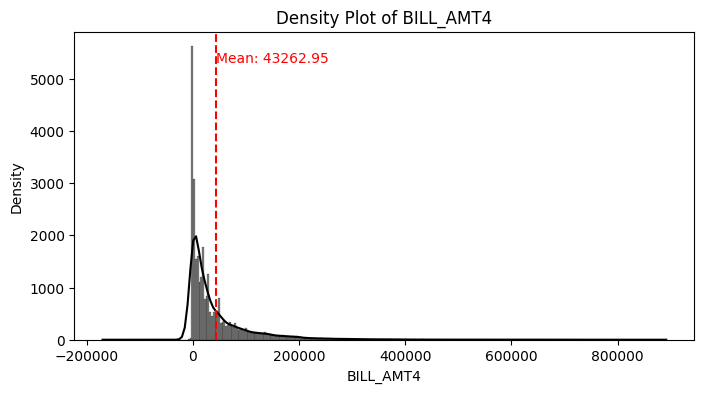

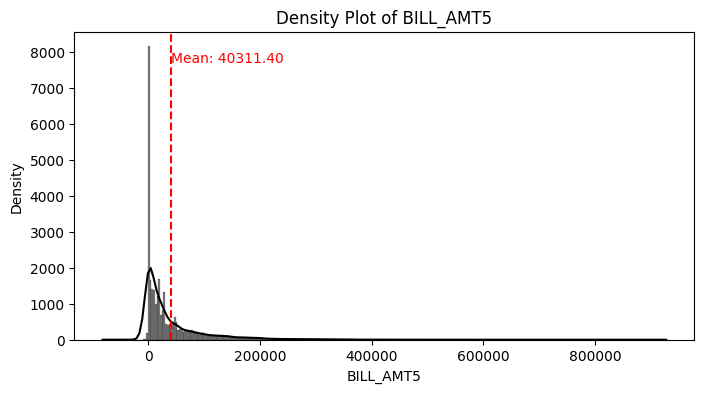

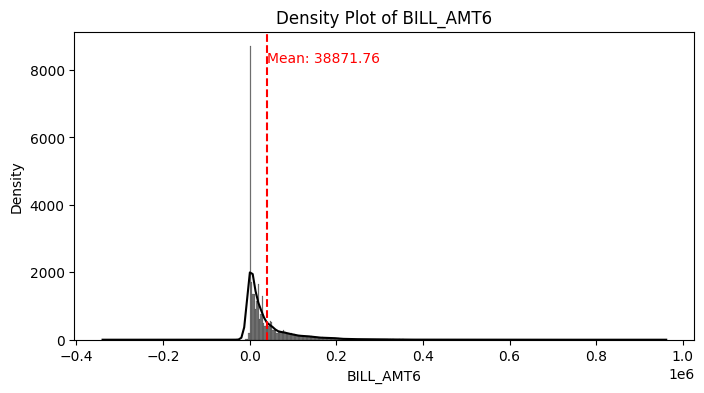

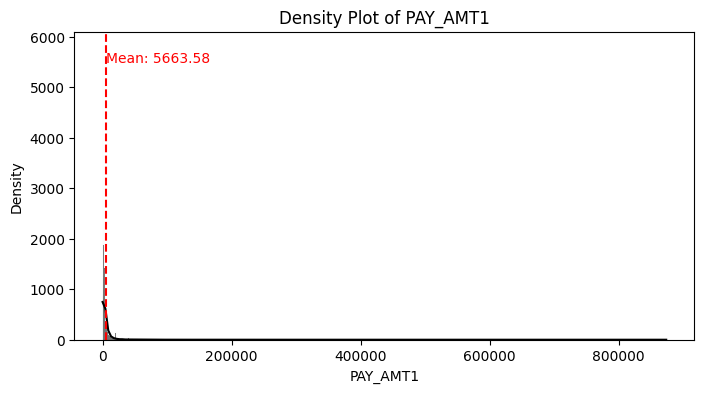

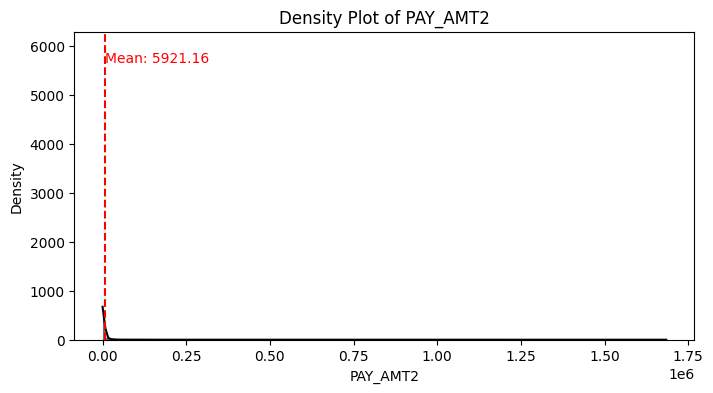

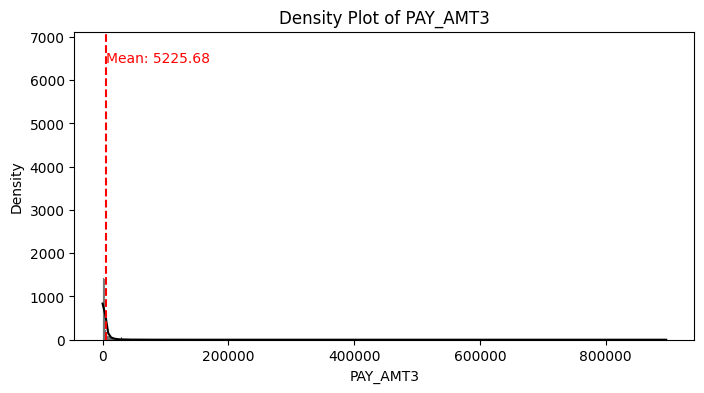

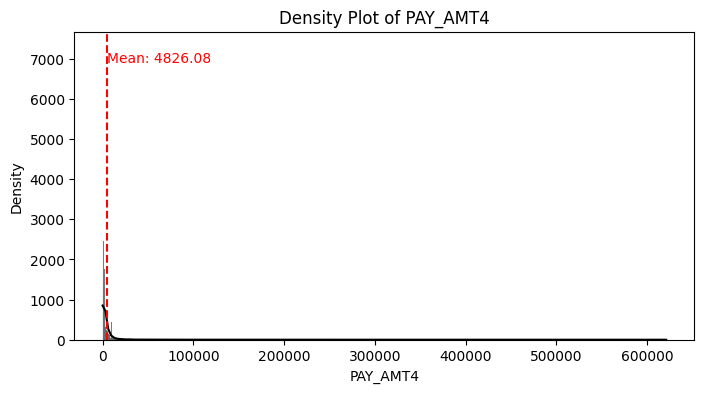

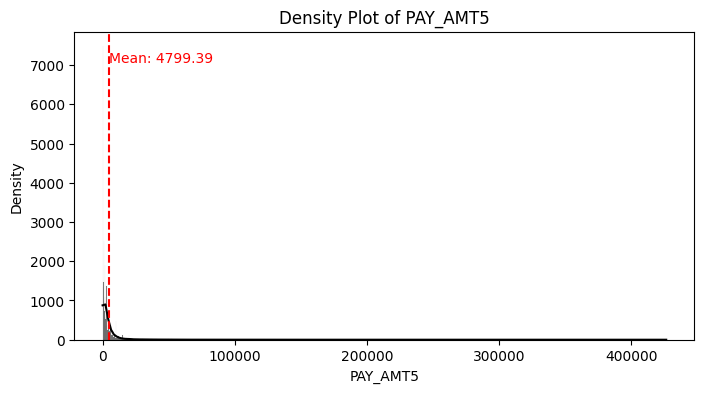

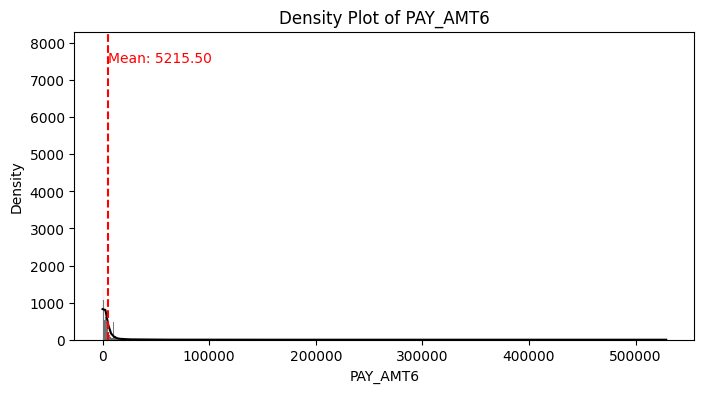

In [8]:
numerical_variables = ["LIMIT_BAL", "AGE", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6", "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]

#Create density plots for each numerical variable
for variable in numerical_variables:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=variable, kde=True, color="black")

    mean_value = df[variable].mean()

    plt.axvline(mean_value, color="red", linestyle="--", label=f"Mean ({mean_value:.2f})")
    plt.text(mean_value, plt.gca().get_ylim()[1]*0.9, f"Mean: {mean_value:.2f}", color="red", ha="left")



    plt.title(f"Density Plot of {variable}")
    plt.xlabel(variable)
    plt.ylabel("Density")
    plt.show()

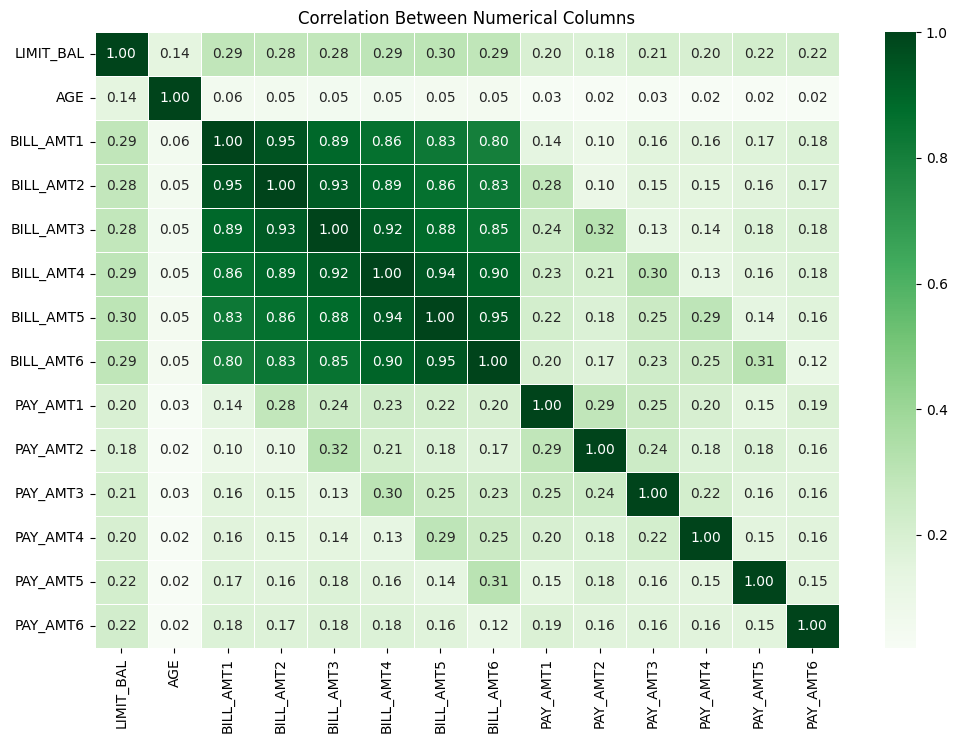

In [79]:
correlation_matrix = df[numerical_variables].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Greens", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Numerical Columns")
plt.show()

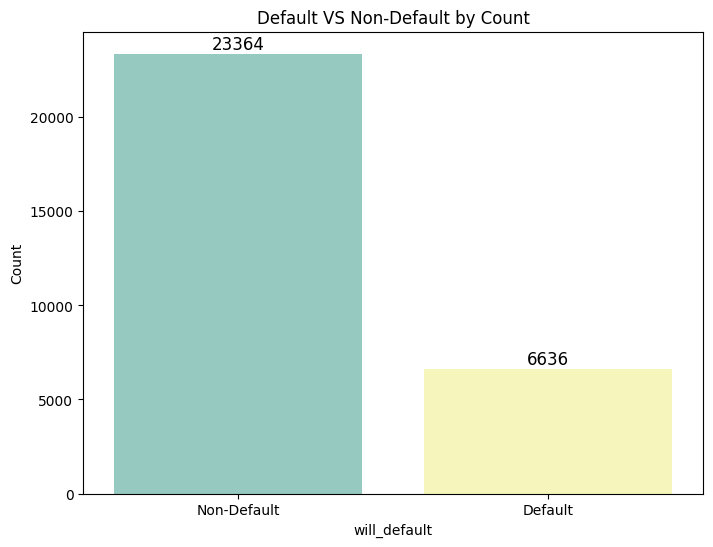

In [85]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='default.payment.next.month', palette="Set3")
plt.title(f"Default VS Non-Default by Count")
plt.xlabel('will_default')
plt.ylabel("Count")
plt.xticks([0, 1], ['Non-Default', 'Default'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(round(height))}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom', fontsize=12)

plt.show()

Highly imbalanced class

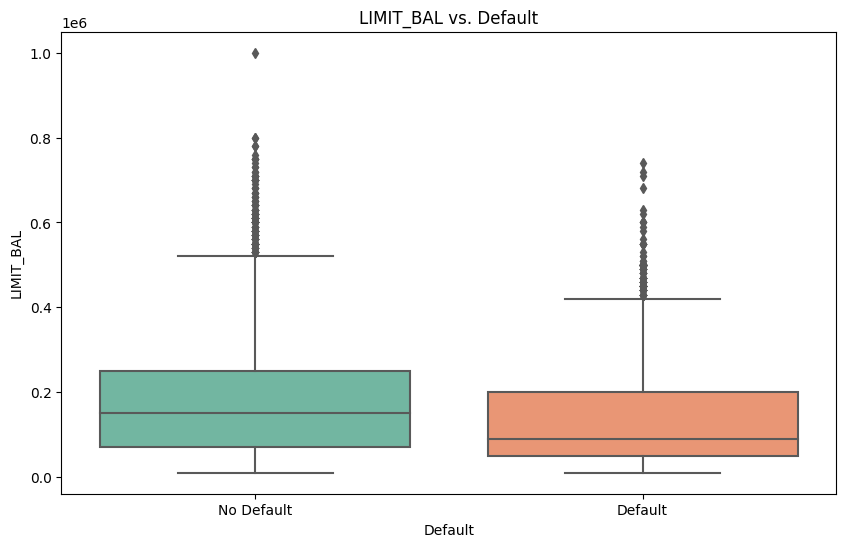

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='default.payment.next.month', y='LIMIT_BAL', palette='Set2')
plt.title("LIMIT_BAL vs. Default")
plt.xlabel("Default")
plt.ylabel("LIMIT_BAL")
plt.xticks([0, 1], ["No Default", "Default"])
plt.show()

Plotting LIMIT_BAL against default.payment.next.month shows that more default customers have lower LIMIT_BAL as compared to non-default customers.

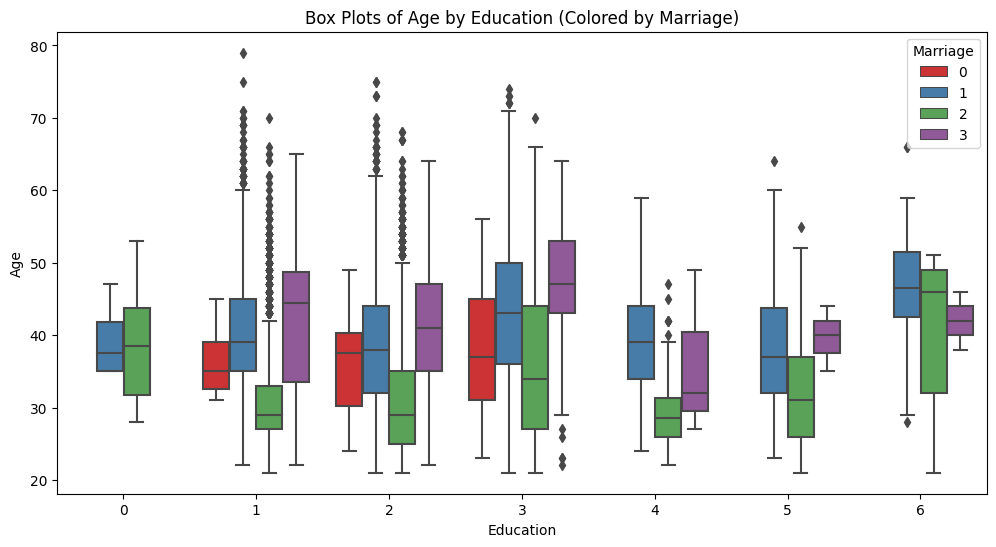

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='EDUCATION', y='AGE', hue='MARRIAGE', palette='Set1')
plt.title("Demographic Distribution of Customers by Age, Education and Marriage")
plt.xlabel("Education")
plt.ylabel("Age")
plt.legend(title="Marriage", loc='upper right')
plt.show()

Most of the customers are aged between 30-40, with the average age of married customers significantly higher than the single ones.

# Data Pre-Processing

In [81]:
# checking for missing data
df.isnull().sum().sort_values(ascending=False)

ID                            0
BILL_AMT2                     0
PAY_AMT6                      0
PAY_AMT5                      0
PAY_AMT4                      0
PAY_AMT3                      0
PAY_AMT2                      0
PAY_AMT1                      0
BILL_AMT6                     0
BILL_AMT5                     0
BILL_AMT4                     0
BILL_AMT3                     0
BILL_AMT1                     0
LIMIT_BAL                     0
PAY_6                         0
PAY_5                         0
PAY_4                         0
PAY_3                         0
PAY_2                         0
PAY_0                         0
AGE                           0
MARRIAGE                      0
EDUCATION                     0
SEX                           0
default.payment.next.month    0
dtype: int64

According to the dataset description, the education column has 6 values: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown). Marriage column has 3 values: (1=married, 2=single, 3=others). However, upon further inspection, both education and marriage column has value 0. 

Hence, for education
- we can combine 0, 5 and 6 with 4 under 'Others'.

For marriage
- we can combine 0 with 3 under 'Others'.

Then, for education, marriage and sex columns
Then, we can convert the numerical column to a categorical column with useful information as the values rather than numbers.
Then, we will generate dummy columns for all 3 column.

In [82]:
print(df["EDUCATION"].unique())
print(df["SEX"].unique())
print(df["MARRIAGE"].unique())

[2 1 3 5 4 6 0]
[2 1]
[1 2 3 0]


In [3]:
df["EDUCATION"].replace({0: 4, 5: 4, 6: 4}, inplace=True)
df["EDUCATION"] = pd.Categorical(df["EDUCATION"])
df["EDUCATION"].replace({1: 'Graduate', 2: 'Undergraduate', 3: 'High School', 4: 'Others'}, inplace=True)

df["SEX"] = pd.Categorical(df["SEX"])
df["SEX"].replace({1: 'Male', 2: 'Female'}, inplace=True)

df["MARRIAGE"].replace({0: 3}, inplace=True)
df["MARRIAGE"] = pd.Categorical(df["MARRIAGE"])
df["MARRIAGE"].replace({1: 'Married', 2: 'Single', 3: 'Others'}, inplace=True)

df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,Female,Undergraduate,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,Undergraduate,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,Undergraduate,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,Undergraduate,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,Undergraduate,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
dummy_col = pd.get_dummies(df[['EDUCATION', 'SEX', 'MARRIAGE']], drop_first=True) #to prevent multicollinearity
categorical_col = list(dummy_col.columns)
categorical_col

df = pd.concat([df, dummy_col], axis='columns')
df = df.drop(['EDUCATION', 'SEX', 'MARRIAGE'], axis='columns')
df.head()


,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,EDUCATION_Undergraduate,EDUCATION_High School,EDUCATION_Others,SEX_Female,MARRIAGE_Single,MARRIAGE_Others
0,1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,...,0.0,0.0,0.0,1,1,0,0,1,0,0
1,2,120000.0,26,-1,2,0,0,0,2,2682.0,...,1000.0,0.0,2000.0,1,1,0,0,1,1,0
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,1000.0,1000.0,5000.0,0,1,0,0,1,1,0
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,1100.0,1069.0,1000.0,0,1,0,0,1,0,0
4,5,50000.0,57,-1,0,-1,0,0,0,8617.0,...,9000.0,689.0,679.0,0,1,0,0,0,0,0


PAY_0,2-6 -> Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

Upon further inspection, these variables also have -2. We take this as pay duly too.

In [5]:
print(df["PAY_0"].unique())
print(df["PAY_2"].unique())
print(df["PAY_3"].unique())
print(df["PAY_4"].unique())
print(df["PAY_5"].unique())
print(df["PAY_6"].unique())

# replacing -1, -2 (pay duly) with 0 to perform chi square test later in the process

df["PAY_0"].replace({-1: 0, -2: 0}, inplace=True)
df["PAY_2"].replace({-1: 0, -2: 0}, inplace=True)
df["PAY_3"].replace({-1: 0, -2: 0}, inplace=True)
df["PAY_4"].replace({-1: 0, -2: 0}, inplace=True)
df["PAY_5"].replace({-1: 0, -2: 0}, inplace=True)
df["PAY_6"].replace({-1: 0, -2: 0}, inplace=True)


[ 2 -1  0 -2  1  3  4  8  7  5  6]
[ 2  0 -1 -2  3  5  7  4  1  6  8]
[-1  0  2 -2  3  4  6  7  1  5  8]
[-1  0 -2  2  3  4  5  7  6  1  8]
[-2  0 -1  2  3  5  4  7  8  6]
[-2  2  0 -1  3  6  4  7  8  5]


In [6]:
# ID has no value -> drop
df = df.drop(['ID'], axis = 1)
df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,EDUCATION_Undergraduate,EDUCATION_High School,EDUCATION_Others,SEX_Female,MARRIAGE_Single,MARRIAGE_Others
0,20000.0,24,2,2,0,0,0,0,3913.0,3102.0,...,0.0,0.0,0.0,1,1,0,0,1,0,0
1,120000.0,26,0,2,0,0,0,2,2682.0,1725.0,...,1000.0,0.0,2000.0,1,1,0,0,1,1,0
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,1000.0,1000.0,5000.0,0,1,0,0,1,1,0
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,1100.0,1069.0,1000.0,0,1,0,0,1,0,0
4,50000.0,57,0,0,0,0,0,0,8617.0,5670.0,...,9000.0,689.0,679.0,0,1,0,0,0,0,0


From density plots above, there seems to be severe outliers for bill_amt1-6 and pay_amt1-6.

In [9]:
# Remove outliers in numerical columns.

def drop_outliers(df, threshold=3):
    z_scores = stats.zscore(df[numerical_variables])
    df_no_outliers = df[(z_scores < threshold).all(axis=1)]
    return df_no_outliers
 
df = drop_outliers(df)
print(df.shape)

(27076, 27)


In [88]:
# scaler = StandardScaler()
# df[numerical_variables] = scaler.fit_transform(df[numerical_variables])
# df.head()
# only transform for X_train and models more sensitive to feature scales

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,EDUCATION_Undergraduate,EDUCATION_High School,EDUCATION_Others,SEX_Female,MARRIAGE_Single,MARRIAGE_Others
0,-1.117143,-1.239866,2,2,0,0,0,0,-0.722892,-0.727516,...,-0.545888,-0.566338,-0.521733,1,1,0,0,1,0,0
1,-0.270600,-1.018602,0,2,0,0,0,2,-0.746822,-0.755382,...,-0.363730,-0.566338,-0.172255,1,1,0,0,1,1,0
2,-0.524563,-0.133543,0,0,0,0,0,0,-0.230554,-0.506429,...,-0.363730,-0.373583,0.351961,0,1,0,0,1,1,0
3,-0.863180,0.198355,0,0,0,0,0,0,0.114527,0.185789,...,-0.345514,-0.360283,-0.346994,0,1,0,0,1,0,0
4,-0.863180,2.411002,0,0,0,0,0,0,-0.631446,-0.675548,...,1.093535,-0.433530,-0.403085,0,1,0,0,0,0,0


# Feature Selection

In [10]:
df.info()
categorical_col

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27076 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   27076 non-null  float64
 1   AGE                         27076 non-null  int64  
 2   PAY_0                       27076 non-null  int64  
 3   PAY_2                       27076 non-null  int64  
 4   PAY_3                       27076 non-null  int64  
 5   PAY_4                       27076 non-null  int64  
 6   PAY_5                       27076 non-null  int64  
 7   PAY_6                       27076 non-null  int64  
 8   BILL_AMT1                   27076 non-null  float64
 9   BILL_AMT2                   27076 non-null  float64
 10  BILL_AMT3                   27076 non-null  float64
 11  BILL_AMT4                   27076 non-null  float64
 12  BILL_AMT5                   27076 non-null  float64
 13  BILL_AMT6                   270

['EDUCATION_Undergraduate',
 'EDUCATION_High School',
 'EDUCATION_Others',
 'SEX_Female',
 'MARRIAGE_Single',
 'MARRIAGE_Others']

In [11]:
X = df[['EDUCATION_Undergraduate',
 'EDUCATION_High School',
 'EDUCATION_Others',
 'SEX_Female',
 'MARRIAGE_Single',
 'MARRIAGE_Others', "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]]
y = df['default.payment.next.month']
chi2_stat, p_values = chi2(X, y)
significance_level = 0.05
selected_features = X.columns[p_values < significance_level]
print(selected_features)

Index(['EDUCATION_Undergraduate', 'EDUCATION_High School', 'EDUCATION_Others',
       'SEX_Female', 'MARRIAGE_Single', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6'],
      dtype='object')


In [12]:
numerical_variables
selected_features.tolist()

['EDUCATION_Undergraduate',
 'EDUCATION_High School',
 'EDUCATION_Others',
 'SEX_Female',
 'MARRIAGE_Single',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6']

In [13]:
log_col = numerical_variables + selected_features.tolist()
print(log_col)
X = df[log_col]
model = LogisticRegression()
model.fit(X, y)
feature_importance = model.coef_[0]
feature_importance_df = pd.DataFrame({'Feature': log_col, 'Importance': feature_importance})
feature_importance_df['AbsImportance'] = feature_importance_df['Importance'].abs()
sorted_feature_importance_df = feature_importance_df.sort_values(by='AbsImportance', ascending=False)

print(sorted_feature_importance_df)

['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDUCATION_Undergraduate', 'EDUCATION_High School', 'EDUCATION_Others', 'SEX_Female', 'MARRIAGE_Single', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
                    Feature    Importance  AbsImportance
8                  PAY_AMT1 -6.522719e-05   6.522719e-05
9                  PAY_AMT2 -5.616999e-05   5.616999e-05
10                 PAY_AMT3 -3.566601e-05   3.566601e-05
12                 PAY_AMT5 -3.223713e-05   3.223713e-05
11                 PAY_AMT4 -2.310629e-05   2.310629e-05
2                 BILL_AMT1 -1.724203e-05   1.724203e-05
13                 PAY_AMT6 -1.542536e-05   1.542536e-05
7                 BILL_AMT6  9.708833e-06   9.708833e-06
3                 BILL_AMT2  8.419483e-06   8.419483e-06
1                       AGE -7.231632e-06   7.231632e-06
0                 LIMIT_BAL -4.169916e-06  

/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
final_features = sorted_feature_importance_df.head(20)['Feature'].tolist()

# Modelling Logistic Regression

/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


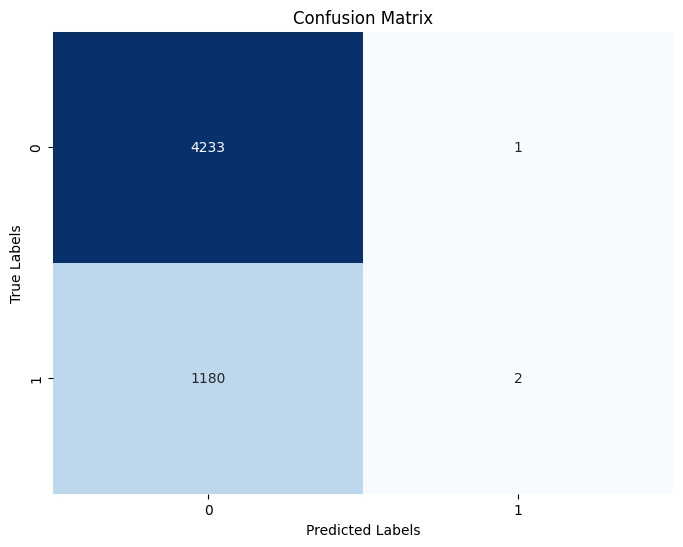

Accuracy: 0.7819
Average Class Accuracy: 0.5007
Harmonic Mean: 0.0034
F1-Score: 0.6868
AUC Score: 0.6587


In [17]:
final_X = df[final_features]
final_y = df['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(final_X, final_y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
avg_class_accuracy = (class_report['Class 0']['recall'] + class_report['Class 1']['recall']) / 2
harmonic_mean = 2 * (class_report['Class 0']['precision'] * class_report['Class 1']['recall']) / (class_report['Class 0']['precision'] + class_report['Class 1']['recall'])
f1_score = class_report['weighted avg']['f1-score']

print(f"Accuracy: {accuracy:.4f}")
print(f"Average Class Accuracy: {avg_class_accuracy:.4f}")
print(f"Harmonic Mean: {harmonic_mean:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print(f"AUC Score: {roc_auc:.4f}")

The model is predicting a lot of false negatives. This might be due to the imbalanced dataset, and consequently the limited positive training dataset.

# Modelling Random Forest

In [18]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

best_rf_model = RandomForestClassifier(random_state=42, **best_params)
best_rf_model.fit(X_train_resampled, y_train_resampled)
y_pred = best_rf_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
avg_class_accuracy = (class_report['Class 0']['recall'] + class_report['Class 1']['recall']) / 2
harmonic_mean = 2 * (class_report['Class 0']['precision'] * class_report['Class 1']['recall']) / (class_report['Class 0']['precision'] + class_report['Class 1']['recall'])
f1_score = class_report['weighted avg']['f1-score']

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Average Class Accuracy: {avg_class_accuracy:.4f}")
print(f"Harmonic Mean: {harmonic_mean:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print(f"AUC Score: {roc_auc:.4f}")

# Modelling SVM

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

svm_model = SVC(random_state=42, probability=True)
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

best_svm_model = SVC(random_state=42, probability=True, **best_params)
best_svm_model.fit(X_train_resampled, y_train_resampled)

y_pred = best_svm_model.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_svm_model.predict_proba(X_test)[:, 1])
class_report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'], output_dict=True)
avg_class_accuracy = (class_report['Class 0']['recall'] + class_report['Class 1']['recall']) / 2
harmonic_mean = 2 * (class_report['Class 0']['precision'] * class_report['Class 1']['recall']) / (class_report['Class 0']['precision'] + class_report['Class 1']['recall'])
f1_score = class_report['weighted avg']['f1-score']
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Average Class Accuracy: {avg_class_accuracy:.4f}")
print(f"Harmonic Mean: {harmonic_mean:.4f}")
print(f"F1-Score: {f1_score:.4f}")
print(f"AUC Score: {roc_auc:.4f}")

KeyboardInterrupt: 